### 목표
 - 버섯의 특징을 활용하여 독/식용 버섯 분류해보자
 - Decision Tree 시각화 & 과대적합 제어
 - 교차검증을 통해서 일반화 성능 정도를 파악해보자
 - 특성의 중요도 확인해보기

#### 필요한 도구 불러오기(환경설정)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # 분류모델

#### 데이터 불러오기

In [2]:
# 컬럼의 값을 최대로 표현해라
pd.set_option('display.max_columns', None)

data = pd.read_csv('data/mushroom.csv')
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# 결측치 확인
# 데이터 타입확인
# 전체적인 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### 데이터 분리
 - 문제(X,특성,특징,피처,독립변수)와 답(y,레이블,타겟, 종속변수)으로 분리
 - 문제 : poisonous 를 제외한 나머지 모든 컬럼
 - 답 : poisonous
 

In [13]:
# 문제 : 타겟을 제외한 나머지
X = data.iloc[:,1:] # data.drop('poisonous', axis = 1) : 삭제하고 싶은거
# 답 : 타겟
y = data['poisonous']

print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [14]:
data.drop('poisonous', axis = 1) # 이방법도 가능

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [15]:
# 기술통계량 확인
data.describe() # 데이터를 가지고있을 때 숫자통계로 보여줌 몇개씩 가지고있는지~

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [17]:
# y 값 확인하기
y # serial 형식임 
y.value_counts() # 개수 확인

e    4208
p    3916
Name: poisonous, dtype: int64

#### 데이터 전처리
 - 데이터 문자 -> 수치 (인코딩)
 - 인코딩 방법 2가지 : 1. 원핫인코딩 2. 레이블인코딩

In [19]:
# 원핫인코딩(one hot) : 값의 크고 작음의 의미가 없을 때
# 원핫인코딩 도구 : pandas 제공 -> pd.get_dummies(컬럼)
X_oh = pd.get_dummies(X)
X_oh.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
# 레이블 인코딩 : 값의 크고 작음의 의미가 있을 때 
# (우선순위 같은 것들 .. 랭킹)
# 예시 코드
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [21]:
# 알파벳이였던 것이 숫자로 바뀜
habitat_dict = {
    'u':2,
    'g':1,
    'm':4,
    'd':3,
    'p':6,
    'w':5,
    'l':7
}

X['habitat'].map(habitat_dict)

0       2
1       1
2       4
3       2
4       1
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

#### 모델링


In [33]:
# 데이터 분리 - 훈련셋 , 테스트셋 데이터 분리
# 분리비율 7:3

X_train, X_test , y_train, y_test = train_test_split(X_oh, 
                                                     y, 
                                                     test_size=0.3, 
                                                     random_state=7)

# 크기확인
print('훈련용문제 : ', X_train.shape)
print('훈련용답 : ', y_train.shape)
print('테스트용문제 : ', X_test.shape)
print('테스트용답 : ', y_test.shape)

훈련용문제 :  (5686, 117)
훈련용답 :  (5686,)
테스트용문제 :  (2438, 117)
테스트용답 :  (2438,)


In [34]:
# 모델 객체 생성
# 과대적합이 쉽게 걸리는 모델 - 단점
# 모델 자체 해석 쉬움 - 장점
tree_model = DecisionTreeClassifier()

### 교차검증
 - 이 모델의 일반화 성능은 어느 정도 될까?
 - 개념 : 일반 성능 측정 방법 -> 모델 데이터에 대해 모델이 얼마나 잘 맞추는가 평가 한번 나눠서 평가하는 것보다는 신뢰도가 높음
 - 방법 : (훈련세트 안에서) 훈련세트와 테스트세트로 여러겹 나눠 평가
 - 모델을 정의하고 학습하기 전에 정확도 얼마인지 확인 가능

In [36]:
from sklearn.model_selection import cross_val_score
# 과대적합 x
# 단순하게 성능 확인하는 용도
# cv = 5 교차 검증 횟수
result = cross_val_score(tree_model, X_train, y_train, cv=5)
print('교차검증 결과평균: ',result.mean())

교차검증 결과평균:  0.9998240985048372


In [38]:
# 모델 학습 : fit(X_train, y_train) # train 값을 넣어야함
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
# 모델 예측 : predict(X_test) # 테스트 문제를 넣어야함
pre = tree_model.predict(X_test)

In [50]:
#모델 평가
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pre) # 100%의 정확도

1.0

### 시각화 패키지 설치 후 시각화

In [53]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree.dot',
               class_names=['독','식용'],
               feature_names=X_oh.columns,
               impurity=False,
               filled=True)

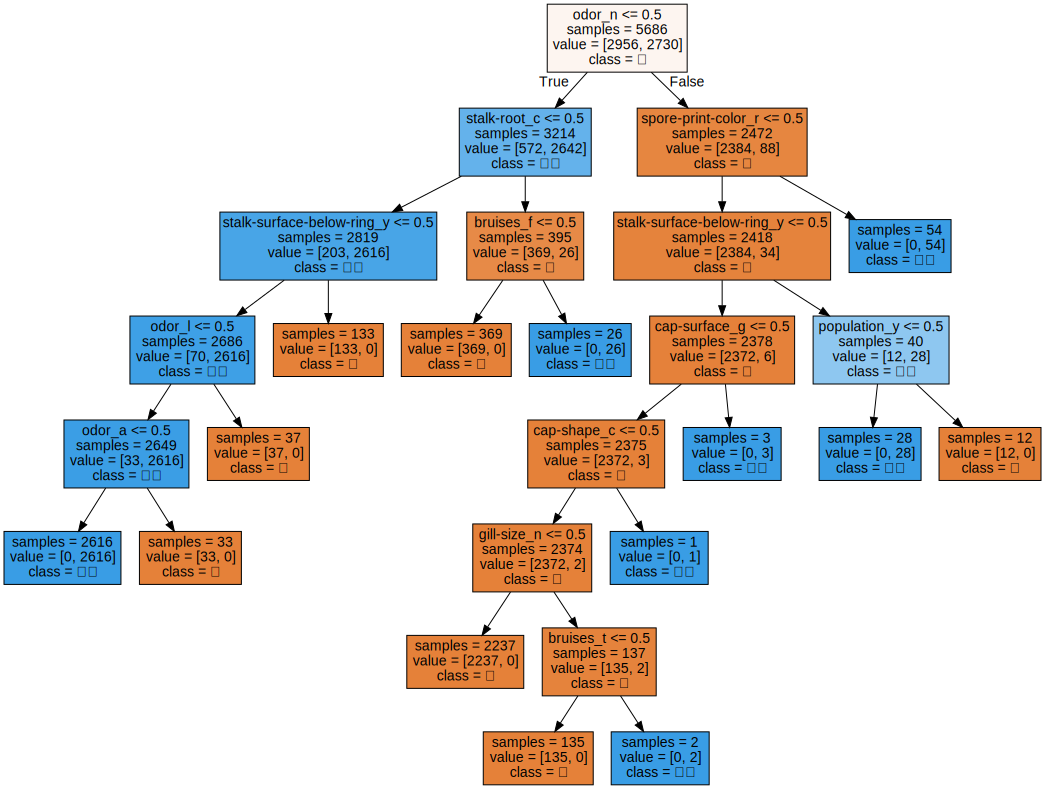

In [54]:
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [57]:
# 과대적합 제어하는 모델 생성해보기
tree_model2 = DecisionTreeClassifier(max_depth=3)
tree_model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

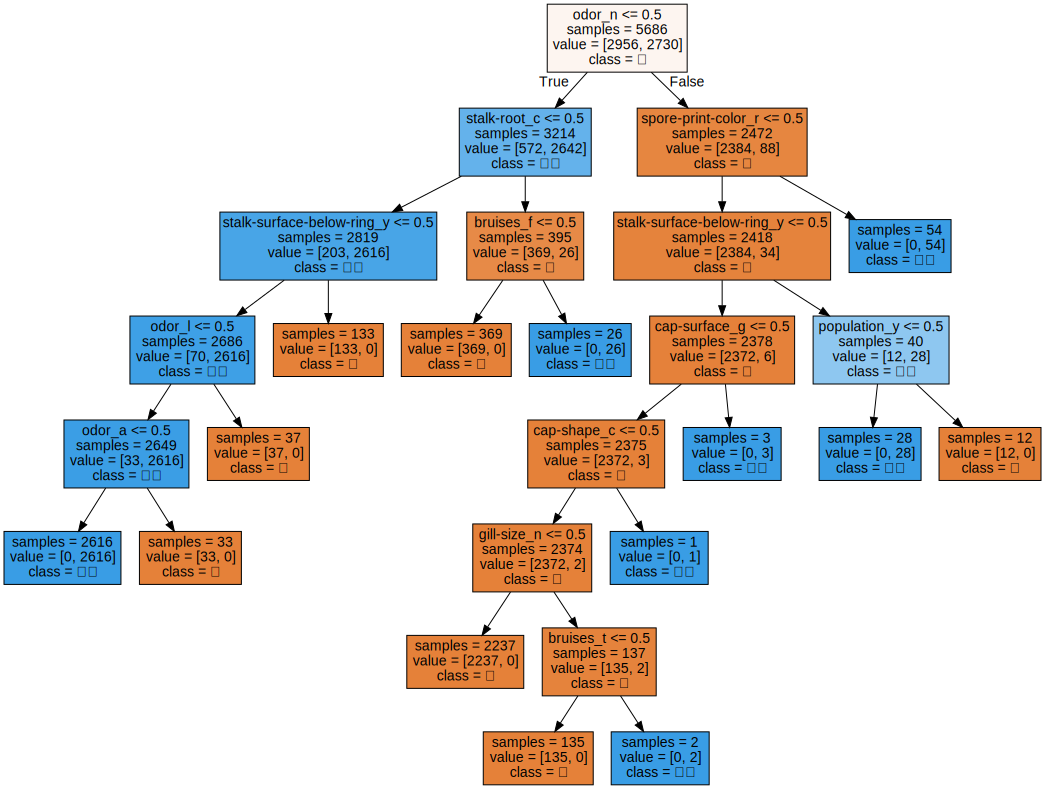

In [58]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree.dot',
               class_names=['독','식용'],
               feature_names=X_oh.columns,
               impurity=False,
               filled=True)

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

#### 모델 특성 중요도 확인
 - 중요한 특성이 무엇인지 확인
 - 특성선택 

In [59]:
fi = tree_model.feature_importances_
fi # 지수표기법 -> 실수형 데이터를 과학적으로 표기한 것

array([0.00000000e+00, 7.03112501e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10578942e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.71136402e-02, 1.38861859e-03, 2.29619887e-02, 0.00000000e+00,
       0.00000000e+00, 2.50743114e-02, 0.00000000e+00, 6.08901883e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.93849405e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.81454492e-01, 0.00000000e+00, 0.00000000e+00,
      

In [63]:
# 판다스 형식으로 변경
# df
importance_df = pd.DataFrame(fi, index=X_oh.columns )
# shift+tab : 설명 // ascending : 내림차순 / 오름차순
importance_df.sort_values(by = 0, ascending = False).head(10)

,0
odor_n,0.608902
stalk-root_c,0.181454
stalk-surface-below-ring_y,0.098180
spore-print-color_r,0.036178
odor_l,0.025074
odor_a,0.022962
bruises_f,0.017114
population_y,0.005919
cap-surface_g,0.002106
bruises_t,0.001389
